# Basic Decomposition with Statsmodels

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


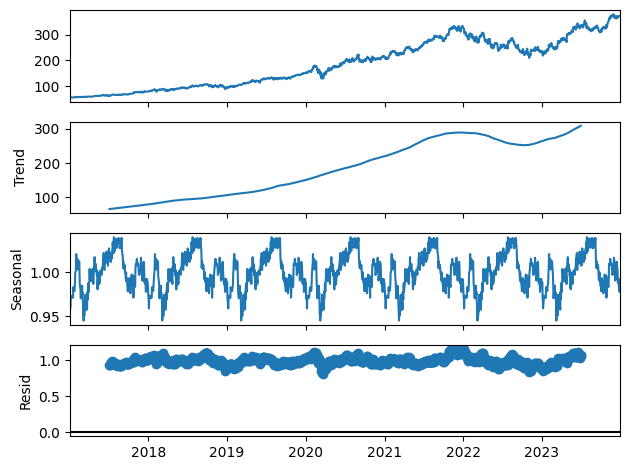

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Download example stock
data = yf.download('MSFT', start='2017-01-01', end='2023-12-31')['Close']

# Decompose
result = seasonal_decompose(data, model='multiplicative', period=252)  # 252 = yearly seasonality (trading days)
result.plot()
plt.tight_layout()
plt.show()


# Log-Transformation + Decomposition

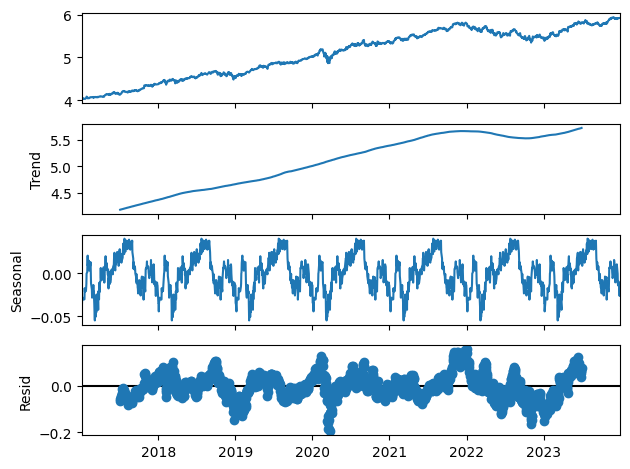

In [4]:
import numpy as np

# Log transformation
log_data = np.log(data)

# Decompose log-transformed series
result_log = seasonal_decompose(log_data, model='additive', period=252)
result_log.plot()
plt.tight_layout()
plt.show()


# Extracting Components for Trading Strategy Design

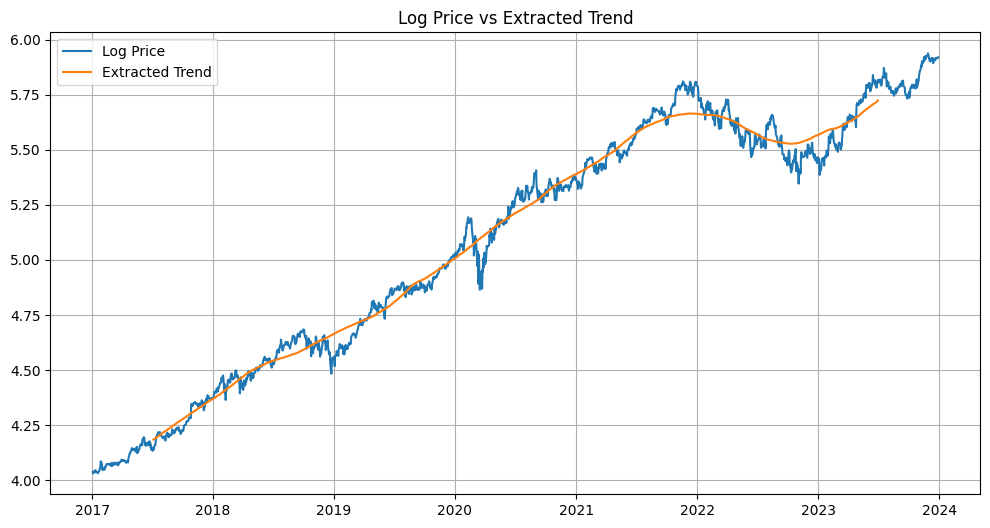

In [6]:
# Extract components
trend = result_log.trend
seasonal = result_log.seasonal
residual = result_log.resid

# Visualize
plt.figure(figsize=(12,6))
plt.plot(log_data, label='Log Price')
plt.plot(trend, label='Extracted Trend')
plt.legend()
plt.title('Log Price vs Extracted Trend')
plt.grid(True)
plt.show()


# Rolling Decomposition (Approximation)

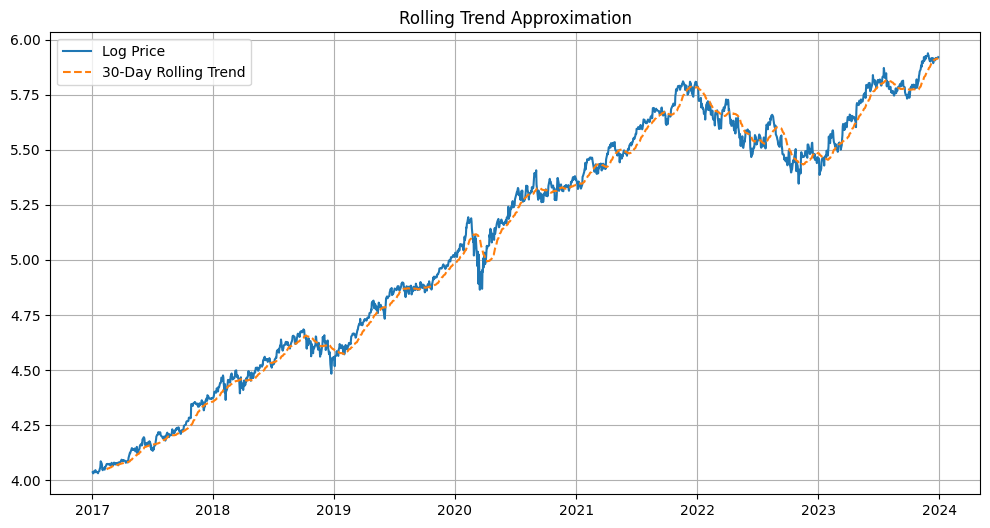

In [8]:
# Rolling Trend Example (30-day window)
rolling_trend = log_data.rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(log_data, label='Log Price')
plt.plot(rolling_trend, label='30-Day Rolling Trend', linestyle='--')
plt.legend()
plt.title('Rolling Trend Approximation')
plt.grid(True)
plt.show()


# Full Example: Decompose Multiple Stocks Automatically

[*********************100%***********************]  5 of 5 completed


Decomposing AAPL ...


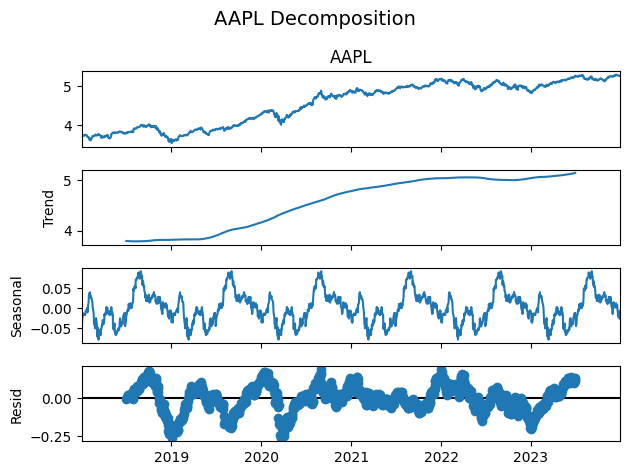

Decomposing MSFT ...


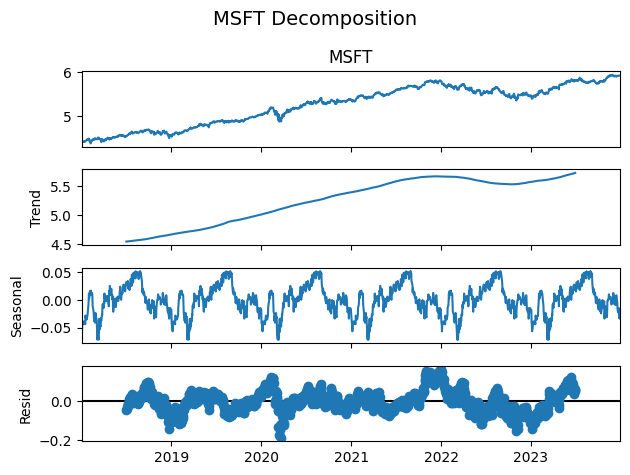

Decomposing GOOGL ...


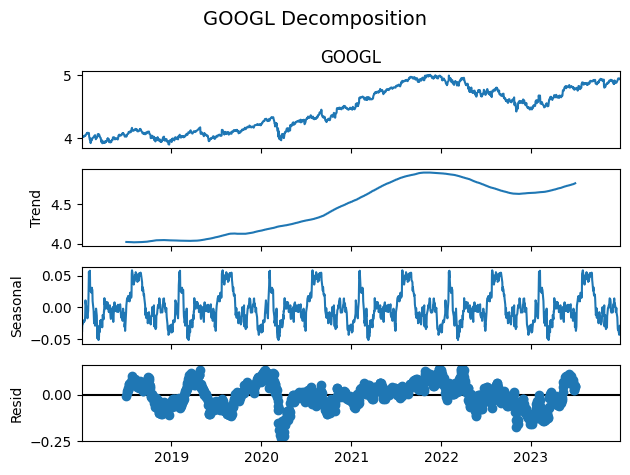

Decomposing AMZN ...


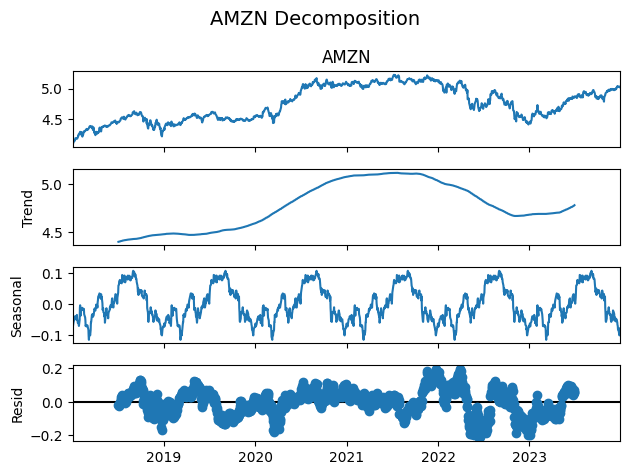

Decomposing TSLA ...


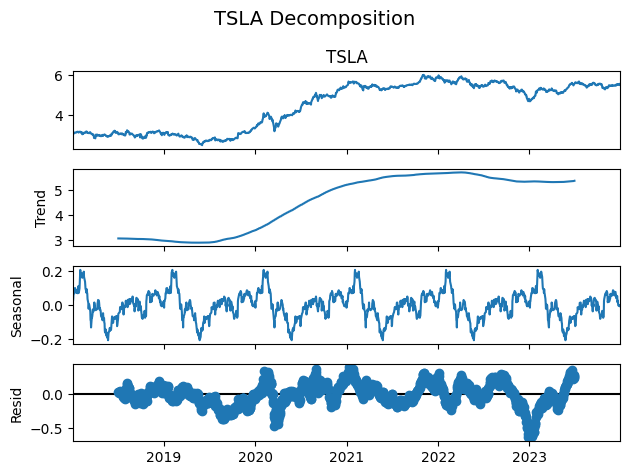

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Portfolio tickers
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Download adjusted close prices
data = yf.download(tickers, start='2018-01-01', end='2023-12-31')['Close']

# Drop missing data (optional)
data.dropna(inplace=True)

# Dictionary to store decomposition results
decompositions = {}

# Loop through each stock
for ticker in tickers:
    print(f"Decomposing {ticker} ...")
    
    # Log-transform
    log_series = np.log(data[ticker])
    
    # Decompose
    result = seasonal_decompose(log_series, model='additive', period=252)
    
    # Store result
    decompositions[ticker] = result
    
    # Plot
    result.plot()
    plt.suptitle(f"{ticker} Decomposition", fontsize=14)
    plt.tight_layout()
    plt.show()
